In [1]:
import pandas as pd

## for plotting
import matplotlib.pyplot as plt  #(3.1.2)
import seaborn as sns  #(0.9.0)

import nltk
import numpy as np
import time

import tensorflow as tf
from tensorflow.keras import callbacks, models, layers, preprocessing as kprocessing

from sklearn.model_selection import train_test_split

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


2022-12-15 19:57:03.224925: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 19:57:03.226146: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 19:57:03.240048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 19:57:03.241268: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 19:57:03.242342: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [2]:
train_df = pd.read_excel('/kaggle/input/articlesummarization/train_df.xlsx')
train_df = train_df.fillna('')
train_df.head()

,Unnamed: 0,paper_id,abstract,body_text,methods,results,abstract_word_count,body_word_count,text_clean,y_clean
0,0,8f97e16f3842e4bbd2d5d1c0c95ac1e31993ec68,"In this short note, we apply the method of De ...","Expected deaths by year, represented by blue s...",,,123,618,expected death year represented blue square pl...,short note apply method de nicola et al 2022 r...
1,2,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,Background Brazil ranks second worldwide in to...,The COVID-19 pandemic has created an unprecede...,Our analysis is based on the SIVEP-Gripe publi...,The SIVEP-Gripe dataset comprised 99 557 patie...,375,4117,covid19 pandemic ha created unprecedented worl...,background brazil rank second worldwide total ...
2,4,e0777fb5df224525ee1b06008582b084c1b6b13b,"The burden of hypertension in South Africa, as...",Raised blood pressure (BP) and hypertension ar...,,"Of 156 participants attending the assessment, ...",244,2958,raised blood pressure bp hypertension wellknow...,burden hypertension south africa well successi...
3,8,a85faaddad3715b80e53657eee1596d2ee8866a6,Strategies to increase the bio-functionality o...,"Bread, regardless of the type, production proc...",,,1084,3945,bread regardless type production process geogr...,strategy increase biofunctionality staple food...
4,9,89afc7a375be1b21ee163ab5877961e19a501638,Vaccine hesitancy could become a significant i...,The death toll of COVID-19 cases and failed pa...,The present study is based on publicly availab...,"In the study sample, most were in the age grou...",250,3344,death toll covid19 case failed pandemic prepar...,vaccine hesitancy could become significant imp...


In [3]:
'''
test_df = pd.read_excel('/kaggle/input/articlesummarization/test_df.xlsx')
test_df = test_df.fillna('')
test_df.head()
'''

"\ntest_df = pd.read_excel('/kaggle/input/articlesummarization/test_df.xlsx')\ntest_df = test_df.fillna('')\ntest_df.head()\n"

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='body_word_count', ylabel='Density'>

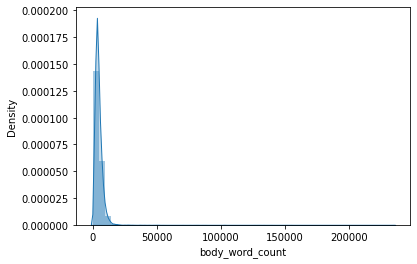

In [4]:
## plot
sns.distplot(train_df["body_word_count"], hist=True, kde=True, kde_kws={"shade":True})


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='abstract_word_count', ylabel='Density'>

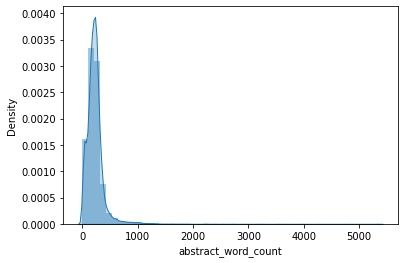

In [5]:
sns.distplot(train_df["abstract_word_count"], hist=True, kde=True, kde_kws={"shade":True})

In [6]:
train_df=train_df.drop(columns=['abstract','body_text','methods','results','abstract_word_count','body_word_count'])
train_df.head()

,Unnamed: 0,paper_id,text_clean,y_clean
0,0,8f97e16f3842e4bbd2d5d1c0c95ac1e31993ec68,expected death year represented blue square pl...,short note apply method de nicola et al 2022 r...
1,2,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,covid19 pandemic ha created unprecedented worl...,background brazil rank second worldwide total ...
2,4,e0777fb5df224525ee1b06008582b084c1b6b13b,raised blood pressure bp hypertension wellknow...,burden hypertension south africa well successi...
3,8,a85faaddad3715b80e53657eee1596d2ee8866a6,bread regardless type production process geogr...,strategy increase biofunctionality staple food...
4,9,89afc7a375be1b21ee163ab5877961e19a501638,death toll covid19 case failed pandemic prepar...,vaccine hesitancy could become significant imp...


In [7]:
train_df, test_df = train_test_split(train_df, test_size=0.2)

In [8]:
train_df=train_df.sample(frac=0.5,replace=True,random_state=32)
train_df

,Unnamed: 0,paper_id,text_clean,y_clean
15428,21795,458d179e43ddad464a30cc8c51af9b7931e019ec,coronavirus disease 2019 covid19 caused high a...,2019 coronavirus outbreak caused home confinem...
789,1131,fa962dd9d8c1592cfdc727a8eb050e9f96bfb257,covid19 coronavirus disease 2019 pandemic ha a...,covid19 coronavirus disease 2019 pandemic ha a...
16800,23726,74ed22a7f535f6c56e4069a081c8a4ebcfe7972c,coronavirus disease 2019 covid19 viral respira...,background coronavirus disease 2019 covid19 po...
12246,17325,09a1199fdaef1f2e2742272ac3708df4f4dff0eb,oral mbi reported affect 60 100 transplant rec...,mucositis inevitable sideeffect conditioning r...
528,774,06f7173e5d3097e5d8c85c8f0dd22c23c37e2aa0,cannabis legalized andor decriminalized across...,background globally medical cannabis legalizat...
...,...,...,...,...
10691,15153,8a2bc71d0b0127ec1695d2fd8746c7325d8758c7,coronavirus disease 2019 covid19 ha spread glo...,aim outbreak coronavirus disease 2019 ha resul...
11206,15892,f6af90a5e3b6a85f64c42d66bbdc9ec3ace4b2ae,index key word babesia cahelli sero diagnosis ...,r peymann 3 1994 diagnosis sia caba infection ...
24564,34856,2140d8a153706f2910ba3a6b66c170bb7be4ff75,healthcare organization historically connected...,valuebased initiative growing importance strat...
13189,18685,f7778201dec1d1cf942577562819fa9841b1db50,landscape critical care delivery emergency dep...,escalating number emergency department ed visi...


In [9]:
test_df

,Unnamed: 0,paper_id,text_clean,y_clean
19665,27762,46887f823ccd02be598e626ff0766426fff99cc6,sarscov sarsassociated coronavirus pathogen se...,sarscov sarsassociated coronavirus wa reported...
7468,10586,5c09c5943c493e103f9fb92d0b6edb17f78dab5e,bronchiolitis viralinduced lower respiratory t...,currently approved treatment infant acute bron...
7831,11091,41f4161992ec762a9cea29d6716a70907306a2c7,activation microglia subsequently elevated inf...,activation microglia subsequently elevated inf...
26344,37360,0b9ce53401e13897fe65e138fcf97126bba3247e,n work eve outbreak deadly coronavirus disease...,study effect coronavirus disease 2019 india mo...
13685,19361,a8fcad0bcfee00c869bd0c8b9e6f2708d19914a2,unprecedented shutdown business specific indus...,investigate economic consequence pandemic gove...
...,...,...,...,...
14674,20757,069c001c359308f31dd976ddbc286aeebfa04969,severe acute respiratory syndrome coronavirus ...,c c e p e n c r p summary environmental mitiga...
21839,30901,9a5fb9b78729aac724e119216870079485bb3eeb,coronavirus disease 2019 covid19 highly contag...,introduction limited information exists regard...
14238,20151,4a238d9def702f5ba132bdc4b528fc54dd7451bf,study population 118 neurological patient recr...,present study high sensitivity shotgun mass sp...
6481,9145,9106288bcdc9e21572ae3ed51e7dfb7c24739b2b,generation monoclonal antibody mab triggered r...,camelids produce conventional heterotetrameric...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


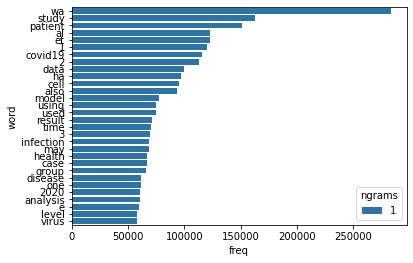

In [10]:
lst_tokens = nltk.tokenize.word_tokenize(train_df["text_clean"].str.cat(sep=" "))
ngrams = [1]
    
## calculate
dtf_freq = pd.DataFrame()
for n in ngrams:
   dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
   dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=
                        ["word","freq"])
   dtf_n["ngrams"] = n
   dtf_freq = dtf_freq.append(dtf_n)
   dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
   dtf_freq_X= dtf_freq.sort_values(["ngrams","freq"], ascending=
                         [True,False])
    
## plot
sns.barplot(x="freq", y="word", hue="ngrams", dodge=False,
 data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


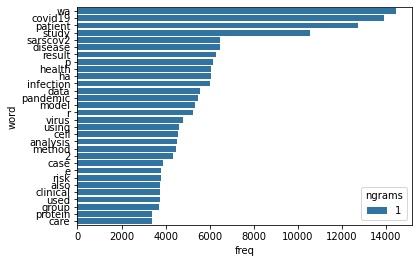

In [11]:
lst_tokens = nltk.tokenize.word_tokenize(train_df["y_clean"].str.cat(sep=" "))
ngrams = [1]
    
## calculate
dtf_freq = pd.DataFrame()
for n in ngrams:
   dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
   dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=
                        ["word","freq"])
   dtf_n["ngrams"] = n
   dtf_freq = dtf_freq.append(dtf_n)
   dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
   dtf_freq_y= dtf_freq.sort_values(["ngrams","freq"], ascending=
                         [True,False])
    
## plot
sns.barplot(x="freq", y="word", hue="ngrams", dodge=False,
 data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(30))
plt.show()

In [12]:
thres = 5 #<-- min frequency
X_top_words = len(dtf_freq_X[dtf_freq_X["freq"]>thres])
y_top_words = len(dtf_freq_y[dtf_freq_y["freq"]>thres])

In [13]:
#Feature Engineering

In [14]:
# Add START and END tokens to the summaries (y)

special_tokens = ("<START>", "<END>")
train_df["y_clean"] = train_df['y_clean'].apply(lambda x: 
                     special_tokens[0]+' '+x+' '+special_tokens[1])



In [15]:
# check example
train_df["y_clean"]

15428    <START> 2019 coronavirus outbreak caused home ...
789      <START> covid19 coronavirus disease 2019 pande...
16800    <START> background coronavirus disease 2019 co...
12246    <START> mucositis inevitable sideeffect condit...
528      <START> background globally medical cannabis l...
                               ...                        
10691    <START> aim outbreak coronavirus disease 2019 ...
11206    <START> r peymann 3 1994 diagnosis sia caba in...
24564    <START> valuebased initiative growing importan...
13189    <START> escalating number emergency department...
24758    <START> cystatins thiol proteinase inhibitor t...
Name: y_clean, Length: 11280, dtype: object

In [16]:
test_df["y_clean"] = test_df['y_clean'].apply(lambda x: 
                     special_tokens[0]+' '+x+' '+special_tokens[1])


In [17]:
test_df['y_clean']

19665    <START> sarscov sarsassociated coronavirus wa ...
7468     <START> currently approved treatment infant ac...
7831     <START> activation microglia subsequently elev...
26344    <START> study effect coronavirus disease 2019 ...
13685    <START> investigate economic consequence pande...
                               ...                        
14674    <START> c c e p e n c r p summary environmenta...
21839    <START> introduction limited information exist...
14238    <START> present study high sensitivity shotgun...
6481     <START> camelids produce conventional heterote...
16443    <START> bitcoin market ha become research hots...
Name: y_clean, Length: 5641, dtype: object

In [18]:
#x vocab
lst_corpus = train_df["text_clean"]
## tokenize text
X_tokenizer = kprocessing.text.Tokenizer(num_words=X_top_words, lower=False, split=' ', oov_token=None, 
filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
X_tokenizer.fit_on_texts(lst_corpus)
X_dic_vocabulary = {"<PAD>":0}
X_dic_vocabulary.update(X_tokenizer.word_index)
## create sequence
lst_text2seq= X_tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=100, padding="post", truncating="post")

In [19]:
# Size of vocabulary (+1 for padding token)
x_voc = X_tokenizer.num_words + 1

In [20]:
#do the same for the test set
## text to sequence with the fitted tokenizer
lst_text2seq = X_tokenizer.texts_to_sequences(test_df["text_clean"])
## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=100,
             padding="post", truncating="post")

In [21]:
#y vocab
lst_corpus = train_df["y_clean"]
## tokenize text
y_tokenizer = kprocessing.text.Tokenizer(num_words=y_top_words, lower=False, split=' ', oov_token=None, 
filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
y_tokenizer.fit_on_texts(lst_corpus)
y_dic_vocabulary = {"<PAD>":0}
y_dic_vocabulary.update(y_tokenizer.word_index)
## create sequence
lst_text2seq= y_tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
y_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=100, padding="post", truncating="post")

In [22]:
#do the same for the test set
## text to sequence with the fitted tokenizer
lst_text2seq = X_tokenizer.texts_to_sequences(test_df["y_clean"])
## padding sequence
y_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=100,
             padding="post", truncating="post")

In [23]:
# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

In [24]:
#do the same for the test set
## text to sequence with the fitted tokenizer
lst_text2seq = y_tokenizer.texts_to_sequences(test_df["y_clean"])
## padding sequence
y_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=100,
             padding="post", truncating="post")

In [25]:
'''
# Add START and END tokens to the summaries (y)

special_tokens = ("<START>", "<END>")
train_df["y_clean"] = train_df['y_clean'].apply(lambda x: 
                     special_tokens[0]+' '+x+' '+special_tokens[1])

# check example
#train_df["y_clean"][0]
'''

'\n# Add START and END tokens to the summaries (y)\n\nspecial_tokens = ("<START>", "<END>")\ntrain_df["y_clean"] = train_df[\'y_clean\'].apply(lambda x: \n                     special_tokens[0]+\' \'+x+\' \'+special_tokens[1])\n\n# check example\n#train_df["y_clean"][0]\n'

In [26]:
#train_df['y_clean'][0]

In [27]:
test_df["y_clean"] = test_df['y_clean'].apply(lambda x: 
                     special_tokens[0]+' '+x+' '+special_tokens[1])
#test_df['y_clean'][0]

In [28]:
#Word Embeddings

In [29]:
## start the matrix (length of vocabulary x vector size) with all 0s
X_embeddings = np.zeros((len(X_dic_vocabulary)+1, 300)) 
for word,idx in X_dic_vocabulary.items():
    ## update the row with vector
    try:
        X_embeddings[idx] =  nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

In [30]:
#Model Creation

In [31]:
'''
lstm_units = 250
embeddings_size = 300

#encoder
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", 
                               input_dim=len(X_dic_vocabulary),
                               output_dim=embeddings_size, 
                               trainable=True)
x_emb = layer_x_emb(x_in)
### lstm 
layer_x_lstm = layers.LSTM(name="x_lstm", units=lstm_units, 
                           dropout=0.4, return_sequences=True, 
                           return_state=True)
x_out, state_h, state_c = layer_x_lstm(x_emb)
'''

'\nlstm_units = 250\nembeddings_size = 300\n\n#encoder\nx_in = layers.Input(name="x_in", shape=(X_train.shape[1],))\n### embedding\nlayer_x_emb = layers.Embedding(name="x_emb", \n                               input_dim=len(X_dic_vocabulary),\n                               output_dim=embeddings_size, \n                               trainable=True)\nx_emb = layer_x_emb(x_in)\n### lstm \nlayer_x_lstm = layers.LSTM(name="x_lstm", units=lstm_units, \n                           dropout=0.4, return_sequences=True, \n                           return_state=True)\nx_out, state_h, state_c = layer_x_lstm(x_emb)\n'

In [32]:
'''
#decoder

y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", 
                               input_dim=len(y_dic_vocabulary), 
                               output_dim=embeddings_size, 
                               trainable=True)
y_emb = layer_y_emb(y_in)
### lstm 
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units, 
                           dropout=0.4, return_sequences=True, 
                           return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", layer=layers.Dense(units=len(y_dic_vocabulary), activation='softmax'))
y_out = layer_dense(y_out)
'''

'\n#decoder\n\ny_in = layers.Input(name="y_in", shape=(None,))\n### embedding\nlayer_y_emb = layers.Embedding(name="y_emb", \n                               input_dim=len(y_dic_vocabulary), \n                               output_dim=embeddings_size, \n                               trainable=True)\ny_emb = layer_y_emb(y_in)\n### lstm \nlayer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units, \n                           dropout=0.4, return_sequences=True, \n                           return_state=True)\ny_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])\n### final dense layers\nlayer_dense = layers.TimeDistributed(name="dense", layer=layers.Dense(units=len(y_dic_vocabulary), activation=\'softmax\'))\ny_out = layer_dense(y_out)\n'

In [33]:
'''
model = models.Model(inputs=[x_in, y_in], outputs=y_out, 
                     name="Seq2Seq")
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()
'''

'\nmodel = models.Model(inputs=[x_in, y_in], outputs=y_out, \n                     name="Seq2Seq")\nmodel.compile(optimizer=\'rmsprop\',\n              loss=\'sparse_categorical_crossentropy\', \n              metrics=[\'accuracy\'])\nmodel.summary()\n'

In [34]:
latent_dim = 300
embedding_dim = 200
max_text_len = 100
max_summary_len = 100

In [35]:

# Encoder
encoder_inputs = layers.Input(shape=(X_train.shape[1],))

# Embedding layer
enc_emb = layers.Embedding(input_dim=x_voc,
                               output_dim=embedding_dim, 
                               trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = layers.LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = layers.LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = layers.LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = layers.Input(shape=(None, ))

# Embedding layer
dec_emb_layer = layers.Embedding(input_dim=y_voc, 
                               output_dim=embedding_dim, 
                               trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = layers.LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = layers.TimeDistributed(layers.Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = models.Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


2022-12-15 20:01:17.559202: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 20:01:17.775406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 20:01:17.776383: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 20:01:17.777205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     19757400    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [36]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [37]:
# Create a callback that saves the model's weights
checkpoint_path = "Seq2Seq"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                                 monitor='val_loss',
                                                 mode='min',
                                                 save_weights_only=True,
                                                 verbose=1)

In [38]:
start = time.time()
training = model.fit(x=[X_train, y_train[:,:-1]], 
                     y=y_train.reshape(y_train.shape[0], 
                                       y_train.shape[1], 
                                       1)[:,1:],
                     batch_size=128, 
                     epochs=50, 
                     shuffle=True, 
                     verbose=1, 
                     validation_split=0.25,
                     callbacks=[callbacks.EarlyStopping(
                                monitor='val_loss', 
                                mode='min', verbose=1, patience=2),cp_callback]
                      )

end = time.time()
print(f'Training took {(end-start)} seconds')

Epoch 1/50


2022-12-15 20:01:20.185530: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


67/67 [==============================] - 184s 3s/step - loss: 7.3824 - accuracy: 0.1430 - val_loss: 6.9780 - val_accuracy: 0.1523

Epoch 00001: val_loss improved from inf to 6.97797, saving model to Seq2Seq
Epoch 2/50
67/67 [==============================] - 169s 3s/step - loss: 6.9096 - accuracy: 0.1545 - val_loss: 6.9134 - val_accuracy: 0.1556

Epoch 00002: val_loss improved from 6.97797 to 6.91341, saving model to Seq2Seq
Epoch 3/50
67/67 [==============================] - 172s 3s/step - loss: 6.8130 - accuracy: 0.1578 - val_loss: 6.8095 - val_accuracy: 0.1596

Epoch 00003: val_loss improved from 6.91341 to 6.80954, saving model to Seq2Seq
Epoch 4/50
67/67 [==============================] - 175s 3s/step - loss: 6.7079 - accuracy: 0.1608 - val_loss: 6.7052 - val_accuracy: 0.1633

Epoch 00004: val_loss improved from 6.80954 to 6.70516, saving model to Seq2Seq
Epoch 5/50
67/67 [==============================] - 172s 3s/step - loss: 6.5839 - accuracy: 0.1653 - val_loss: 6.5954 - val_acc

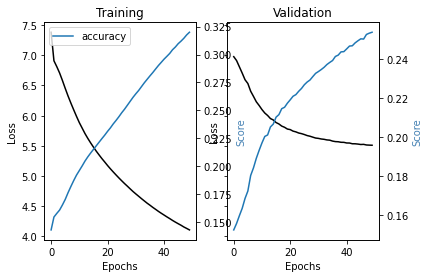

In [39]:
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [40]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = X_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [41]:
# Inference Models

# Encode the input sequence to get the feature vector
encoder_model = models.Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = layers.Input(shape=(latent_dim, ))
decoder_state_input_c = layers.Input(shape=(latent_dim, ))
decoder_hidden_state_input = layers.Input(shape=(X_train.shape[1], latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = models.Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [42]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['START']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'END':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'END' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [43]:
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['START'] and i \
            != target_word_index['END']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [44]:
for i in range(0, 9):
    print ('Article:', seq2text(X_train[i]))
    print ('Original summary:', seq2summary(y_train[i]))
    print ('Predicted summary:', decode_sequence(X_train[i].reshape(1,
           X_train.shape[1])))
    print('\n')

Article: coronavirus disease 2019 covid19 caused high alert devastating effect respiratory system high infection risk led world health organization declare pandemic outbreak 1 starting 9 march 2020 italian prime minister virus spread ordered implementation physical distancing measure school many recreational cultural sport center must stay closed order avoid humantohuman transmission 2 3 safeguard health athlete others involved olympics paralympics event well sport competition international national regional level postponed 2021 erased 4 may 2020 quarantine measure kept large number people isolation restricting activity practice interaction significant psychological effect individual society colleague 4 suggested longer quarantine duration infection fear inadequate information financial loss 
Original summary: 2019 coronavirus outbreak caused home confinement well training sport competition withdrawal prolonged inactivity impact lack inperson interaction among could negatively affect a